# 01 - PCA

In [1]:
import pandas as pd
import numpy as np
from numpy import log
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from requests import get
from io import StringIO
from sklearn import preprocessing

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM/export?format=csv&id=1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM&gid=2001946666'
r = get(url)
data = r.content.decode('utf-8')

df = pd.read_csv(StringIO(data))
df.head()

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,goal_2017_CL,assist_2017_CL,pres_tot,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,4,3,124,64,42,23,13,7,7.96,180000000
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,6,3,369,219,135,53,32,23,8.41,180000000
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,6,2,657,573,229,129,106,28,8.71,180000000
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,10,5,328,135,77,34,16,6,7.61,150000000
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,7,2,317,182,43,16,13,3,7.32,150000000


In [3]:
df.columns

Index(['nome', 'nome_chiave', 'eta', 'ruolo', 'ruolo_dettaglio', 'squadra',
       'nazione_squadra', 'nazione_giocatore', 'instagram_followers',
       'facebook_followers', 'twitter_followers', 'insta_likes_avg',
       'google_hits', 'google_hits_1', 'wiki_visual', 'insta_hashtag',
       'GER_kicker', 'GER_bild_G', 'GER_eurosport_G', 'ITA_corriere',
       'ITA_sky_G', 'ITA_gazzetta_G', 'ENG_thesun', 'ENG_sky_G',
       'ENG_guardian_G', 'SPA_marca', 'SPA_as_G', 'SPA_mundodep_G',
       'FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G',
       'FRA_le10sport_G', 'INT_eurosport_G', 'INT_espn_G', 'INT_bein_G',
       'pres_2018_tot', 'goal_2018_tot', 'assist_2018_tot', 'pres_2018_CL',
       'goal_2018_CL', 'assist_2018_CL', 'pres_2017_tot', 'goal_2017_tot',
       'assist_2017_tot', 'pres_2017_CL', 'goal_2017_CL', 'assist_2017_CL',
       'pres_tot', 'goal_tot', 'assist_tot', 'pres_tot_CL', 'goal_tot_CL',
       'assist_tot_CL', 'whoscored1819', 'valore'],
      dtype='obje

In [4]:
df = df[df['nome']!='Paulinho']
df = df[df['nazione_squadra'] != 'Cina']
df = df[df['nazione_squadra'] != 'Olanda']
df = df[df['nazione_squadra'] != 'Portogallo']
df.reset_index(inplace=True,drop=True)

In [5]:
df.shape

(284, 55)

### Germany

In [7]:
cols = ['GER_bild_G', 'GER_eurosport_G', 'GER_kicker']
X1 = log(df[cols])
X1 = preprocessing.scale(X1)
X1 = pd.DataFrame(X1)
X1.columns = ['GER_bild_G', 'GER_eurosport_G', 'GER_kicker']
X1.head()

,GER_bild_G,GER_eurosport_G,GER_kicker
0,1.138565,1.003381,0.319746
1,2.049762,2.361907,1.475530
2,2.017419,1.588387,2.007685
3,1.131298,0.889815,0.830547
4,0.620319,1.124234,0.399066


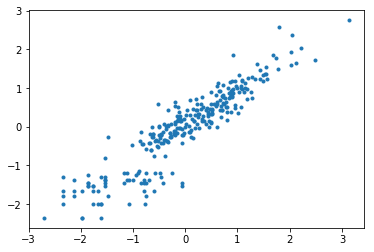

In [8]:
plt.plot(X1.GER_bild_G, X1.GER_eurosport_G, '.')

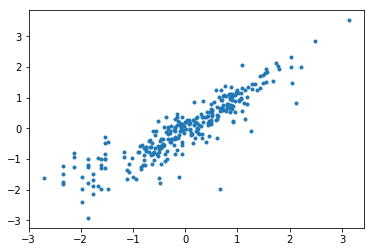

In [9]:
plt.plot(X1.GER_bild_G, X1.GER_kicker, '.')

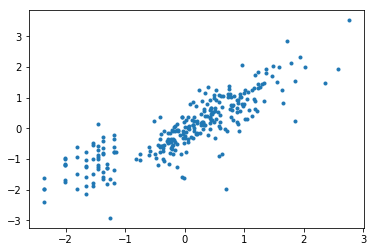

In [10]:
plt.plot(X1.GER_eurosport_G, X1.GER_kicker, '.')

In [11]:
X1.corr()

,GER_bild_G,GER_eurosport_G,GER_kicker
GER_bild_G,1.000000,0.920737,0.896982
GER_eurosport_G,0.920737,1.000000,0.854590
GER_kicker,0.896982,0.854590,1.000000


In [12]:
pca1 = PCA()
scores1 = pca1.fit_transform(X1)
m_germany = pd.DataFrame(scores1).iloc[:,0]

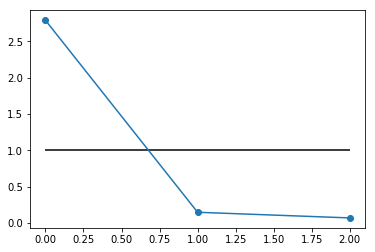

In [13]:
plt.plot(pca1.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

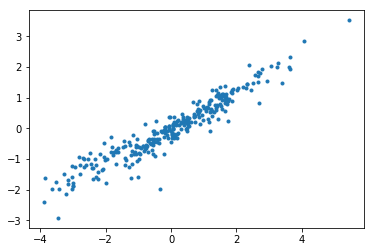

In [14]:
plt.plot(m_germany, X1.GER_kicker, '.')

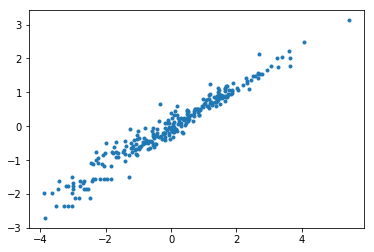

In [15]:
plt.plot(m_germany, X1.GER_bild_G, '.')

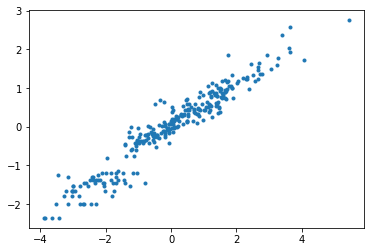

In [16]:
plt.plot(m_germany, X1.GER_eurosport_G, '.')

### Italy

In [17]:
cols = ['ITA_corriere', 'ITA_sky_G','ITA_gazzetta_G']
X2 = log(df[cols])
X2 = preprocessing.scale(X2)
X2 = pd.DataFrame(X2)
X2.columns = ['ITA_corriere', 'ITA_sky_G','ITA_gazzetta_G']
X2.head()

,ITA_corriere,ITA_sky_G,ITA_gazzetta_G
0,0.919397,2.087856,1.282709
1,1.642760,2.040445,1.615816
2,2.137481,1.893095,2.081426
3,1.605121,2.241052,1.185154
4,0.314337,0.406032,1.000874


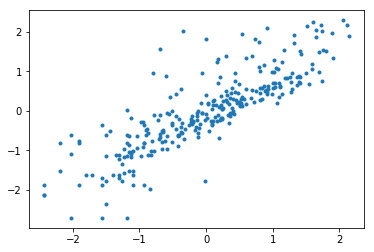

In [18]:
plt.plot(X2.ITA_corriere, X2.ITA_sky_G, '.')

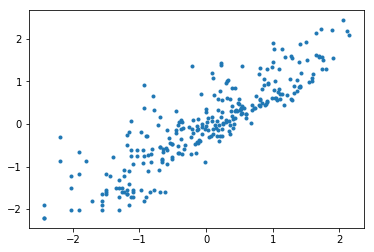

In [19]:
plt.plot(X2.ITA_corriere, X2.ITA_gazzetta_G, '.')

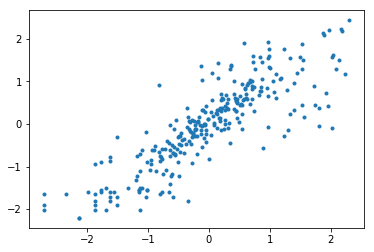

In [20]:
plt.plot(X2.ITA_sky_G, X2.ITA_gazzetta_G, '.')

In [21]:
X2.corr()

,ITA_corriere,ITA_sky_G,ITA_gazzetta_G
ITA_corriere,1.000000,0.842451,0.878293
ITA_sky_G,0.842451,1.000000,0.850012
ITA_gazzetta_G,0.878293,0.850012,1.000000


In [22]:
pca2 = PCA()
scores2 = pca2.fit_transform(X2)
m_italy = pd.DataFrame(scores2).iloc[:,0]

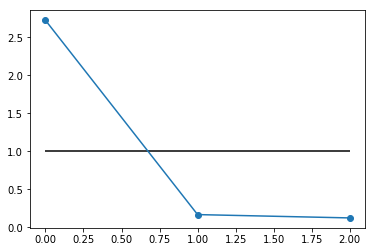

In [23]:
plt.plot(pca2.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

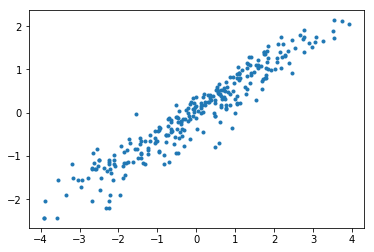

In [24]:
plt.plot(m_italy, X2.ITA_corriere, '.')

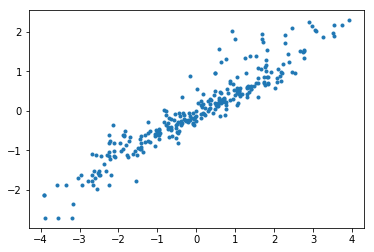

In [25]:
plt.plot(m_italy, X2.ITA_sky_G, '.')

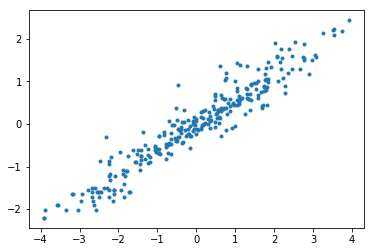

In [26]:
plt.plot(m_italy, X2.ITA_gazzetta_G, '.')

### England

In [27]:
cols = ['ENG_thesun', 'ENG_sky_G', 'ENG_guardian_G']
X3 = log(df[cols])
X3 = preprocessing.scale(X3)
X3 = pd.DataFrame(X3)
X3.columns = ['ENG_thesun', 'ENG_sky_G', 'ENG_guardian_G']
X3.head()

,ENG_thesun,ENG_sky_G,ENG_guardian_G
0,1.284150,1.114425,0.449953
1,1.765447,1.173711,1.576204
2,1.860336,1.116875,1.970122
3,1.482228,2.134814,1.218815
4,1.915215,1.614186,2.214683


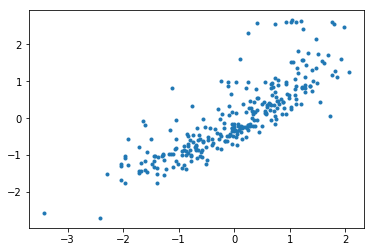

In [28]:
plt.plot(X3.ENG_thesun, X3.ENG_sky_G, '.')

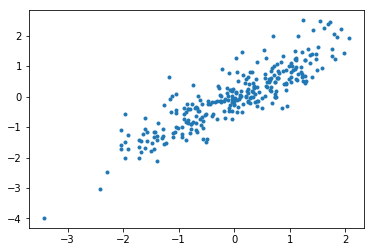

In [29]:
plt.plot(X3.ENG_thesun, X3.ENG_guardian_G, '.')

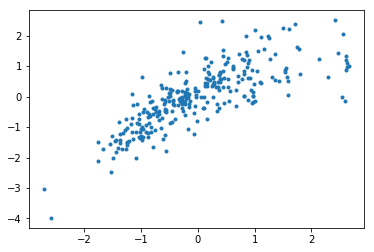

In [30]:
plt.plot(X3.ENG_sky_G, X3.ENG_guardian_G, '.')

In [37]:
X3.corr()

,ENG_thesun,ENG_sky_G,ENG_guardian_G
ENG_thesun,1.000000,0.833045,0.883381
ENG_sky_G,0.833045,1.000000,0.776605
ENG_guardian_G,0.883381,0.776605,1.000000


In [38]:
pca3 = PCA()
scores3 = pca3.fit_transform(X3)
m_england = pd.DataFrame(scores3).iloc[:,0]*(-1)

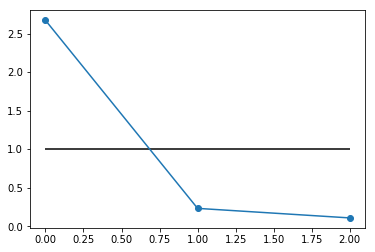

In [39]:
plt.plot(pca3.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

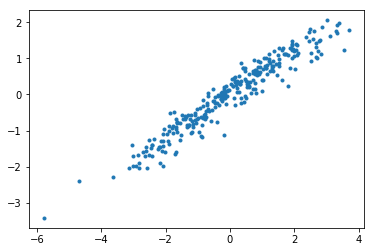

In [40]:
plt.plot(m_england, X3.ENG_thesun, '.')

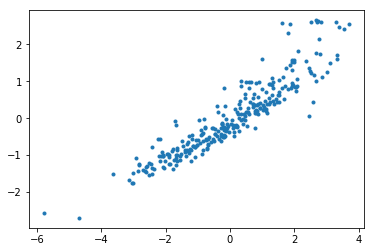

In [41]:
plt.plot(m_england, X3.ENG_sky_G, '.')

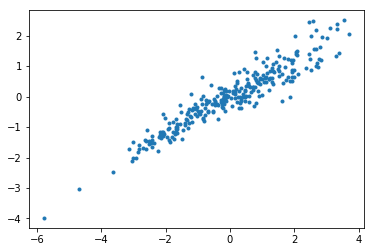

In [42]:
plt.plot(m_england, X3.ENG_guardian_G, '.')

### Spain

In [43]:
cols = ['SPA_marca', 'SPA_as_G', 'SPA_mundodep_G']
X4 = log(df[cols])
X4 = preprocessing.scale(X4)
X4 = pd.DataFrame(X4)
X4.columns = ['SPA_marca', 'SPA_as_G', 'SPA_mundodep_G']
X4.head()

,SPA_marca,SPA_as_G,SPA_mundodep_G
0,0.593427,2.019286,1.044921
1,1.938900,2.409089,3.118767
2,2.580576,3.123519,3.308577
3,0.474133,1.501549,0.595284
4,0.202068,0.984592,2.894423


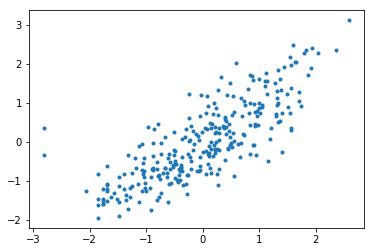

In [44]:
plt.plot(X4.SPA_marca, X4.SPA_as_G, '.')

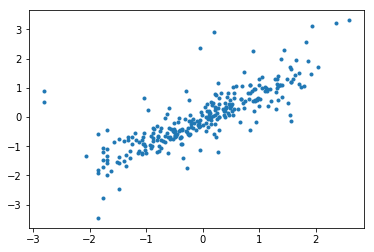

In [45]:
plt.plot(X4.SPA_marca, X4.SPA_mundodep_G, '.')

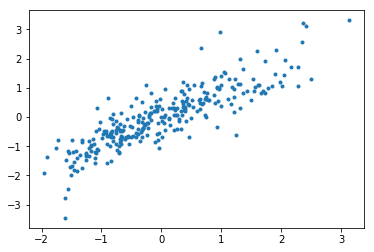

In [46]:
plt.plot(X4.SPA_as_G, X4.SPA_mundodep_G, '.')

In [47]:
X4.corr()

,SPA_marca,SPA_as_G,SPA_mundodep_G
SPA_marca,1.000000,0.804816,0.816924
SPA_as_G,0.804816,1.000000,0.863006
SPA_mundodep_G,0.816924,0.863006,1.000000


In [48]:
pca4 = PCA()
scores4 = pca4.fit_transform(X4)
m_spain = pd.DataFrame(scores4).iloc[:,0]

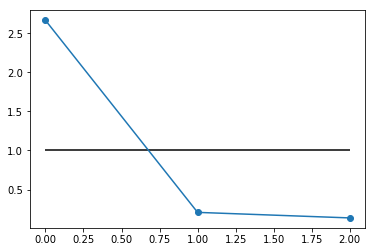

In [49]:
plt.plot(pca4.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

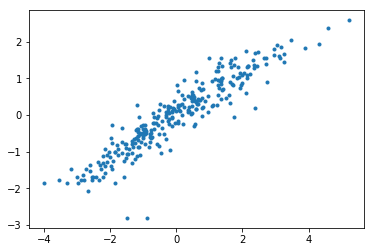

In [50]:
plt.plot(m_spain, X4.SPA_marca, '.')

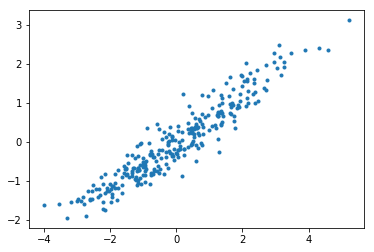

In [51]:
plt.plot(m_spain, X4.SPA_as_G, '.')

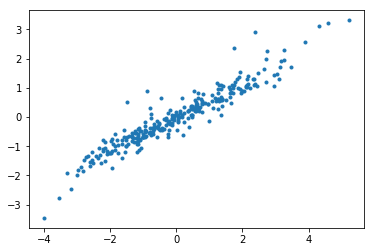

In [52]:
plt.plot(m_spain, X4.SPA_mundodep_G, '.')

### France

In [53]:
cols=['FRA_francefootball_G','FRA_lequipe_G', 'FRA_eurosport_G']
X5 = log(df[cols])
X5 = preprocessing.scale(X5)
X5 = pd.DataFrame(X5)
X5.columns = ['FRA_francefootball_G','FRA_lequipe_G', 'FRA_eurosport_G']
X5.head()

,FRA_francefootball_G,FRA_lequipe_G,FRA_eurosport_G
0,2.335468,2.456858,2.369632
1,2.442333,2.581671,2.057198
2,2.399059,2.525985,2.184106
3,0.750276,1.458494,1.790708
4,0.585177,0.626712,0.662948


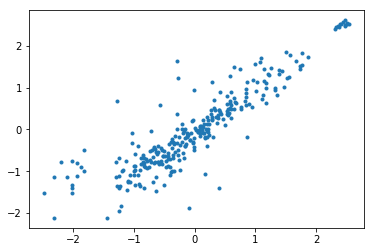

In [54]:
plt.plot(X5.FRA_francefootball_G, X5.FRA_lequipe_G, '.')

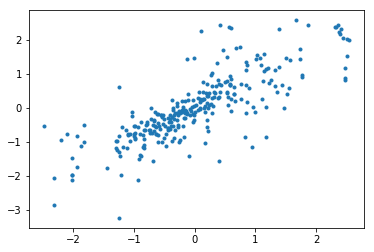

In [55]:
plt.plot(X5.FRA_francefootball_G, X5.FRA_eurosport_G, '.')

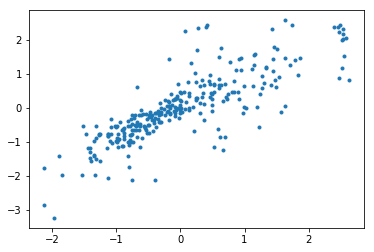

In [56]:
plt.plot(X5.FRA_lequipe_G, X5.FRA_eurosport_G, '.')

In [57]:
X5.corr()

,FRA_francefootball_G,FRA_lequipe_G,FRA_eurosport_G
FRA_francefootball_G,1.000000,0.898338,0.802098
FRA_lequipe_G,0.898338,1.000000,0.820935
FRA_eurosport_G,0.802098,0.820935,1.000000


In [61]:
pca5 = PCA()
scores5 = pca5.fit_transform(X5)
m_france = pd.DataFrame(scores5).iloc[:,0]*(-1)

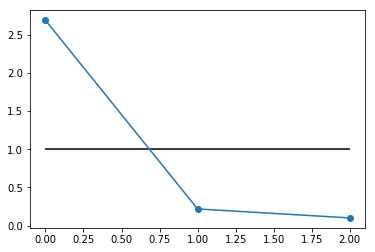

In [62]:
plt.plot(pca5.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

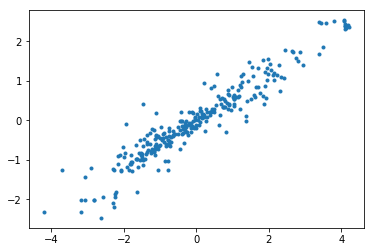

In [63]:
plt.plot(m_france, X5.FRA_francefootball_G, '.')

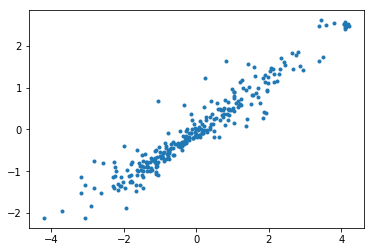

In [64]:
plt.plot(m_france, X5.FRA_lequipe_G, '.')

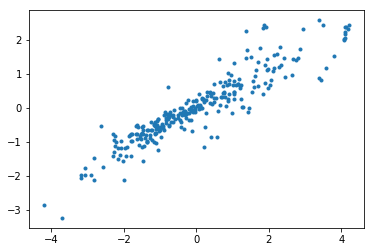

In [65]:
plt.plot(m_france, X5.FRA_eurosport_G, '.')

### International

In [66]:
cols=['INT_eurosport_G', 'INT_espn_G','INT_bein_G']
X6 = log(df[cols])
X6 = preprocessing.scale(X6)
X6 = pd.DataFrame(X6)
X6.columns = ['INT_eurosport_G', 'INT_espn_G','INT_bein_G']
X6.head()

,INT_eurosport_G,INT_espn_G,INT_bein_G
0,1.767403,1.570140,1.572046
1,2.286068,2.269766,2.311270
2,2.403065,2.541919,2.442161
3,1.400394,2.222734,1.425916
4,1.598804,1.210337,0.956267


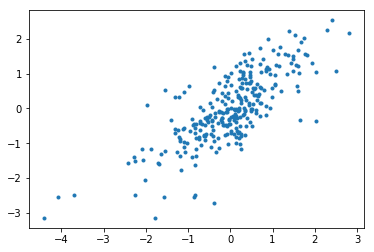

In [67]:
plt.plot(X6.INT_eurosport_G, X6.INT_espn_G, '.')

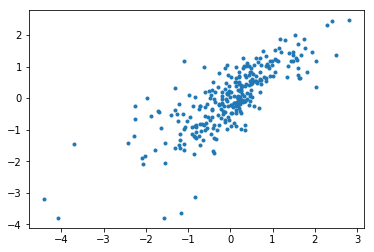

In [68]:
plt.plot(X6.INT_eurosport_G, X6.INT_bein_G, '.')

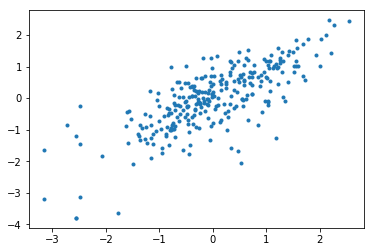

In [69]:
plt.plot(X6.INT_espn_G, X6.INT_bein_G, '.')

In [70]:
X6.corr()

,INT_eurosport_G,INT_espn_G,INT_bein_G
INT_eurosport_G,1.000000,0.766342,0.789681
INT_espn_G,0.766342,1.000000,0.755502
INT_bein_G,0.789681,0.755502,1.000000


In [71]:
pca6 = PCA()
scores6 = pca6.fit_transform(X6)
m_int = pd.DataFrame(scores6).iloc[:,0]*(-1)

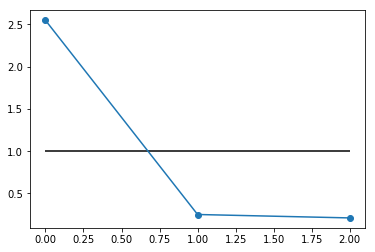

In [72]:
plt.plot(pca6.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

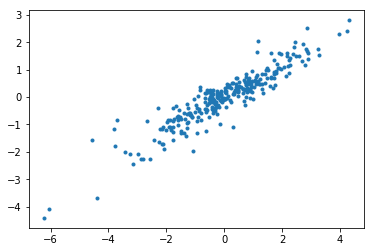

In [73]:
plt.plot(m_int, X6.INT_eurosport_G, '.')

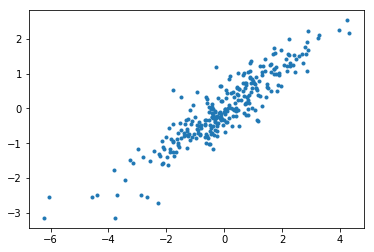

In [74]:
plt.plot(m_int, X6.INT_espn_G, '.')

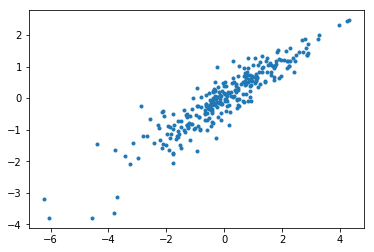

In [75]:
plt.plot(m_int, X6.INT_bein_G, '.')

### Social

In [76]:
cols=['instagram_followers','facebook_followers', 'twitter_followers', 'insta_likes_avg']
X7 = log(df[cols])

In [77]:
for i in list(X7):
    nan = [np.isnan(x) for x in X7[i]]
    indexes = [index for index in range(len(nan)) if nan[index] == True]
    X7.loc[indexes,i] = np.mean(X7[i])

In [78]:
X7 = preprocessing.scale(X7)
X7 = pd.DataFrame(X7)
X7.columns = ['instagram_followers','facebook_followers', 'twitter_followers', 'insta_likes_avg']
X7.head()

,instagram_followers,facebook_followers,twitter_followers,insta_likes_avg
0,1.777453,0.579986,9.966831e-01,2.196171
1,2.672266,2.503926,2.677226e+00,2.309265
2,2.649974,2.713144,2.046739e-15,2.905528
3,1.715847,1.594805,1.686464e+00,2.144387
4,1.074576,0.586748,1.045928e+00,0.673132


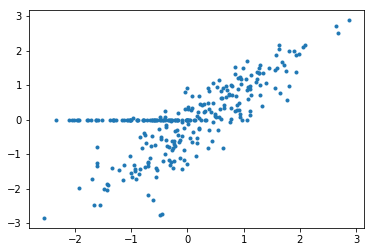

In [79]:
plt.plot(X7.instagram_followers, X7.facebook_followers, '.')

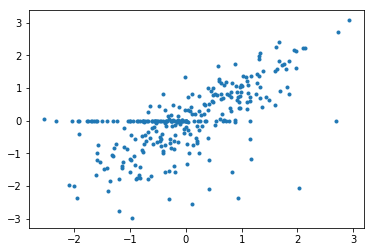

In [500]:
plt.plot(X7.instagram_followers, X7.twitter_followers, '.')

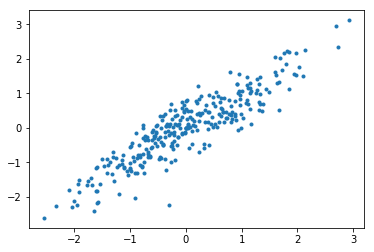

In [501]:
plt.plot(X7.instagram_followers, X7.insta_likes_avg, '.')

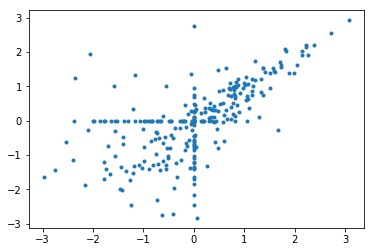

In [502]:
plt.plot(X7.twitter_followers, X7.facebook_followers, '.')

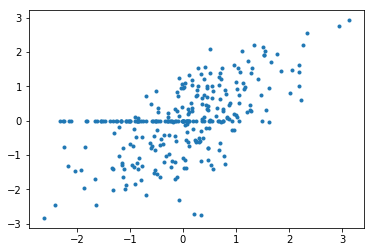

In [503]:
plt.plot(X7.insta_likes_avg, X7.facebook_followers, '.')

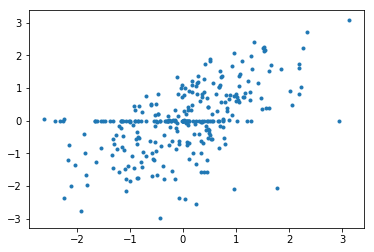

In [504]:
plt.plot(X7.insta_likes_avg, X7.twitter_followers, '.')

In [505]:
X7.corr()

,instagram_followers,facebook_followers,twitter_followers,insta_likes_avg
instagram_followers,1.000000,0.735443,0.650855,0.904292
facebook_followers,0.735443,1.000000,0.628665,0.598998
twitter_followers,0.650855,0.628665,1.000000,0.552870
insta_likes_avg,0.904292,0.598998,0.552870,1.000000


In [507]:
pca7 = PCA()
scores7 = pca7.fit_transform(X7)
m_social = pd.DataFrame(scores7).iloc[:,0]

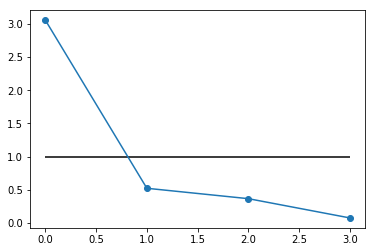

In [509]:
plt.plot(pca7.explained_variance_, 'o-')
plt.hlines(1, 0, 3)

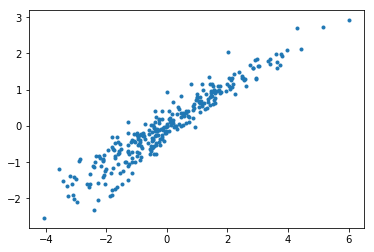

In [510]:
plt.plot(m_social, X7.instagram_followers, '.')

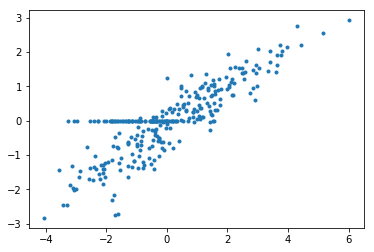

In [511]:
plt.plot(m_social, X7.facebook_followers, '.')

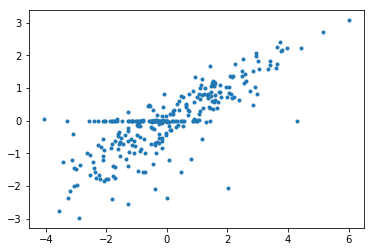

In [512]:
plt.plot(m_social, X7.twitter_followers, '.')

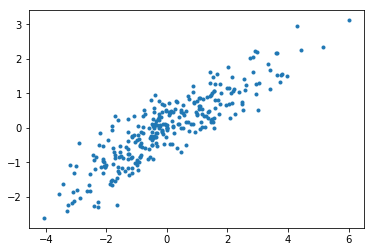

In [513]:
plt.plot(m_social, X7.insta_likes_avg, '.')

### Web searches

In [17]:
cols=['google_hits_1', 'wiki_visual', 'insta_hashtag']
X8 = log(df[cols])
X8 = preprocessing.scale(X8)
X8 = pd.DataFrame(X8)
X8.columns = ['google_hits_1', 'wiki_visual', 'insta_hashtag']
X8.head()

,google_hits_1,wiki_visual,insta_hashtag
0,0.926375,2.548797,1.472285
1,1.537373,2.437751,2.723961
2,1.972826,3.042636,2.928973
3,2.176723,2.504090,1.974610
4,1.782893,2.253243,0.887049


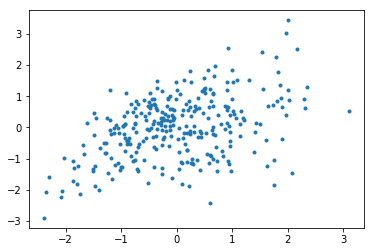

In [18]:
plt.plot(X8.google_hits_1, X8.wiki_visual, '.')

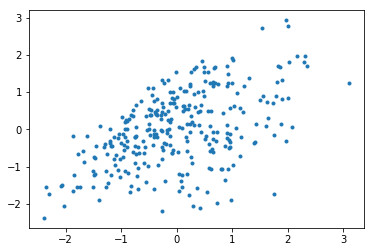

In [19]:
plt.plot(X8.google_hits_1, X8.insta_hashtag, '.')

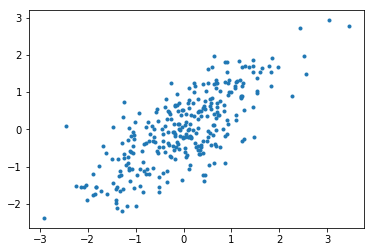

In [20]:
plt.plot(X8.wiki_visual, X8.insta_hashtag, '.')

In [21]:
X8.corr()

,google_hits_1,wiki_visual,insta_hashtag
google_hits_1,1.000000,0.434948,0.512069
wiki_visual,0.434948,1.000000,0.758935
insta_hashtag,0.512069,0.758935,1.000000


In [22]:
pca8 = PCA()
scores8 = pca8.fit_transform(X8)
m_web = pd.DataFrame(scores8).iloc[:,0]

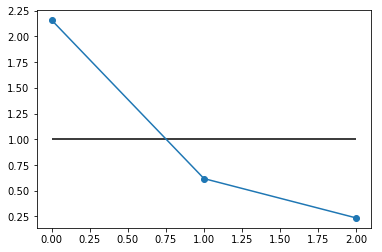

In [23]:
plt.plot(pca8.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

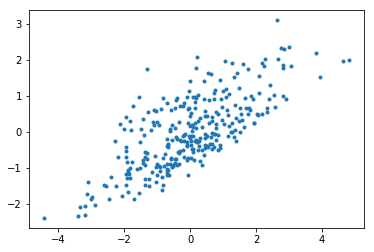

In [25]:
plt.plot(m_web, X8.google_hits_1, '.')

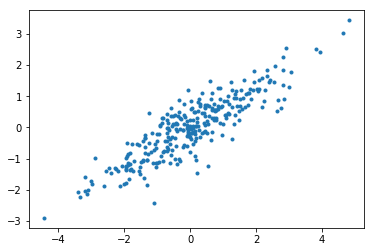

In [26]:
plt.plot(m_web, X8.wiki_visual, '.')

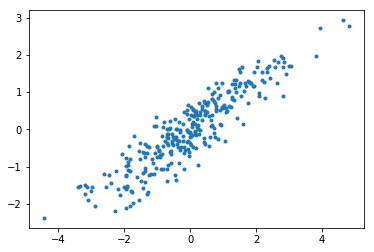

In [27]:
plt.plot(m_web, X8.insta_hashtag, '.')

### Instagram

In [13]:
cols=['instagram_followers','insta_likes_avg', 'insta_hashtag']
X9 = log(df[cols])
for i in list(X9):
    nan = [np.isnan(x) for x in X9[i]]
    indexes = [index for index in range(len(nan)) if nan[index] == True]
    X9.loc[indexes,i] = np.mean(X9[i])
X9 = preprocessing.scale(X9)
X9 = pd.DataFrame(X9)
X9.columns = ['instagram_followers','insta_likes_avg', 'insta_hashtag']
X9.head()

,instagram_followers,insta_likes_avg,insta_hashtag
0,1.820058,2.233621,1.472285
1,2.722071,2.347542,2.723961
2,2.699600,2.948167,2.928973
3,1.757956,2.181458,1.974610
4,1.111526,0.699441,0.887049


In [14]:
X9.corr()

,instagram_followers,insta_likes_avg,insta_hashtag
instagram_followers,1.000000,0.904292,0.871264
insta_likes_avg,0.904292,1.000000,0.825650
insta_hashtag,0.871264,0.825650,1.000000


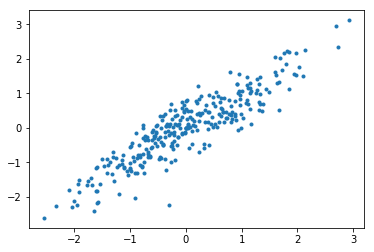

In [16]:
plt.plot(X9.instagram_followers, X9.insta_likes_avg, '.')

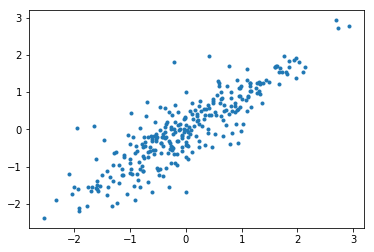

In [17]:
plt.plot(X9.instagram_followers, X9.insta_hashtag, '.')

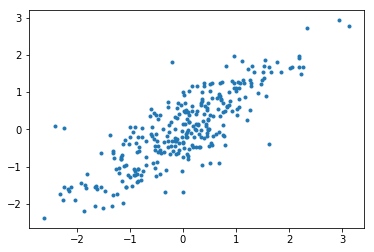

In [18]:
plt.plot(X9.insta_likes_avg, X9.insta_hashtag, '.')

In [19]:
pca9 = PCA()
scores9 = pca9.fit_transform(X9)
m_insta = pd.DataFrame(scores9).iloc[:,0]

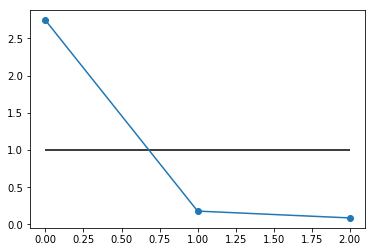

In [20]:
plt.plot(pca9.explained_variance_, 'o-')
plt.hlines(1, 0, 2)

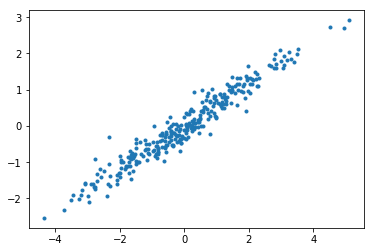

In [21]:
plt.plot(m_insta, X9.instagram_followers, '.')

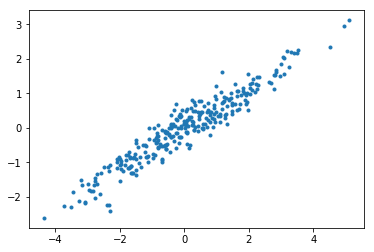

In [22]:
plt.plot(m_insta, X9.insta_likes_avg, '.')

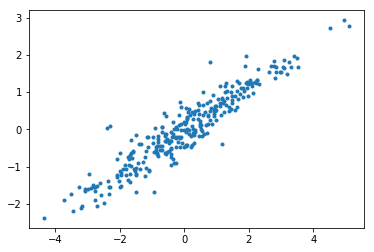

In [23]:
plt.plot(m_insta, X9.insta_hashtag, '.')